# end to end model

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random 
import os
import pathlib
import numpy as np

In [4]:
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
tf.random.set_seed(42)

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                          batch_size=32,
                                          target_size=(224,224),
                                          class_mode="binary",
                                          seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [8]:
model_1.fit(train_data,
           epochs=5,
           #steps_per_epoch=len(train_data),
           validation_data=test_data,
           #validation_steps=len(test_data)
           )

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 152ms/step - accuracy: 0.6230 - loss: 0.6403 - val_accuracy: 0.7880 - val_loss: 0.4637
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.7948 - loss: 0.4562 - val_accuracy: 0.8080 - val_loss: 0.4398
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.7860 - loss: 0.4490 - val_accuracy: 0.8520 - val_loss: 0.3450
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.8400 - loss: 0.3911 - val_accuracy: 0.8440 - val_loss: 0.3763
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.8217 - loss: 0.4081 - val_accuracy: 0.8220 - val_loss: 0.3928


In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [10]:
def load_and_prep_image(filename,img_shape=244):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img

In [11]:
def prediction(pic,model):
    image=load_and_prep_image(pic)
    image
    image_resized=tf.image.resize(image, (224, 224))
    image_expanded = tf.expand_dims(image_resized, axis=0)
    
    pred = model.predict(image_expanded)
    pred_class=class_names[int(tf.round(pred))]
    pred_class
    plt.title(f"prediction:{pred_class}")
    plt.imshow(image)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


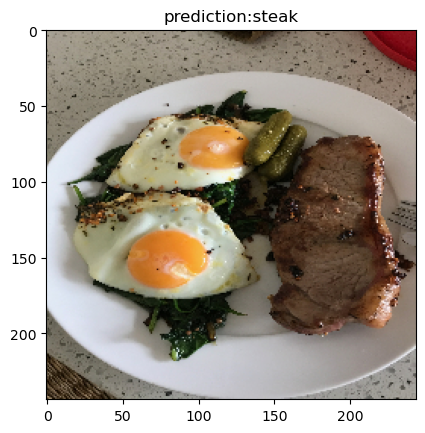

In [16]:
prediction("examples/03-steak.jpeg",model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


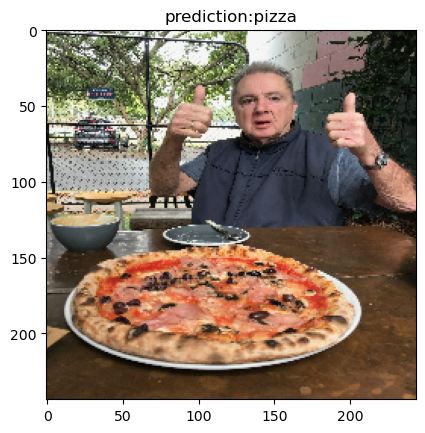

In [20]:
prediction("examples/03-pizza-dad.jpeg",model_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


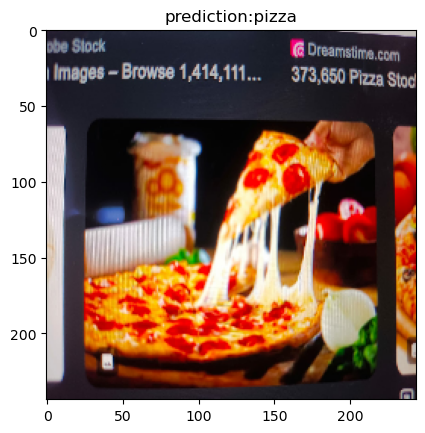

In [22]:
prediction("examples/hats .jpeg",model_1)